# 나이브 베이즈 분류기

-> 베이즈 정리에 기반한 통계적 분류 기법

* feature끼리 서로 독립이라는 조건이 필요
* 각 클래스에 대한 가능도 비교를 통한 분류

# Mushroom Classification

### 데이터 설명(출처: kaggle)
* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

* bruises: bruises=t,no=f

* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

* gill-attachment: attached=a,descending=d,free=f,notched=n

* gill-spacing: close=c,crowded=w,distant=d

* gill-size: broad=b,narrow=n

* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

* stalk-shape: enlarging=e,tapering=t

* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* veil-type: partial=p,universal=u

* veil-color: brown=n,orange=o,white=w,yellow=y

* ring-number: none=n,one=o,two=t

* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


##### * class: p 독버섯, e일반

In [1]:
# 패키지 설치
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 데이터 불러오기

In [2]:
# 데이터 불러오기
mush= pd.read_csv('C:/Users/82102/Desktop/mushrooms.csv')
mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
# 데이터 정보 확인
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
# 결측값 확인
mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

* 결측값 없음

## EDA 및 시각화

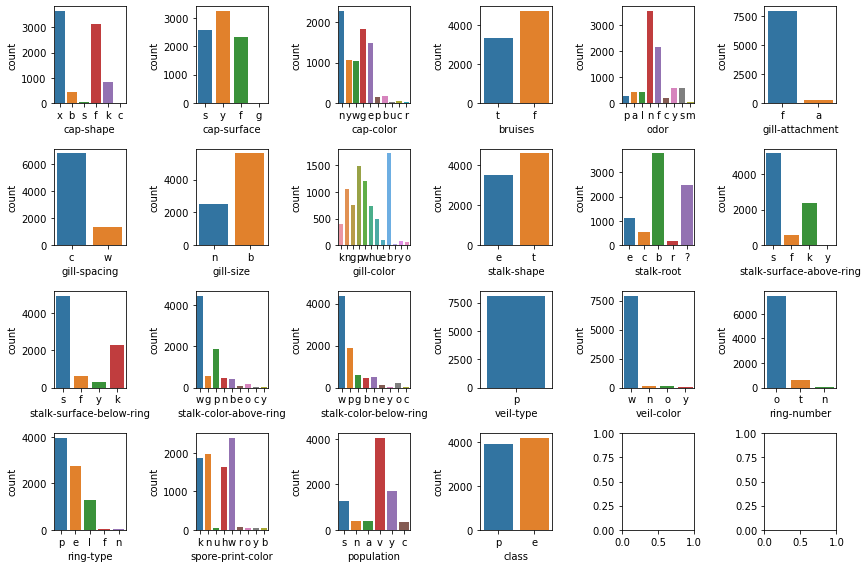

In [7]:
fig,axes = plt.subplots(nrows=4,ncols=6,figsize=(12,8))
sns.countplot(x="cap-shape",data= mush,ax=axes[0,0])
sns.countplot(x="cap-surface", data= mush, ax=axes[0,1])
sns.countplot(x="cap-color",data=mush,ax=axes[0,2])
sns.countplot(x="bruises",data=mush,ax=axes[0,3])
sns.countplot(x="odor",data=mush,ax=axes[0,4])
sns.countplot(x="gill-attachment",data=mush,ax=axes[0,5])
sns.countplot(x="gill-spacing",data=mush,ax=axes[1,0])
sns.countplot(x="gill-size",data=mush,ax=axes[1,1])
sns.countplot(x="gill-color",data=mush,ax=axes[1,2])
sns.countplot(x="stalk-shape",data=mush,ax=axes[1,3])
sns.countplot(x="stalk-root",data=mush,ax=axes[1,4])
sns.countplot(x="stalk-surface-above-ring",data=mush,ax=axes[1,5])
sns.countplot(x="stalk-surface-below-ring",data= mush,ax=axes[2,0])
sns.countplot(x="stalk-color-above-ring", data= mush, ax=axes[2,1])
sns.countplot(x="stalk-color-below-ring",data=mush,ax=axes[2,2])
sns.countplot(x="veil-type",data=mush,ax=axes[2,3])
sns.countplot(x="veil-color",data= mush,ax=axes[2,4])
sns.countplot(x="ring-number", data= mush, ax=axes[2,5])
sns.countplot(x="ring-type",data=mush,ax=axes[3,0])
sns.countplot(x="spore-print-color",data=mush,ax=axes[3,1])
sns.countplot(x="population",data=mush,ax=axes[3,2])
sns.countplot(x="habitat",data=mush,ax=axes[3,3])
sns.countplot(x="class",data=mush,ax=axes[3,3])
plt.tight_layout()